<a href="https://colab.research.google.com/github/hubeidata/semaforo_nutricional/blob/Task_Tayra/prediccion_umbral_de_confianza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1/1 [==============================] - 1s 912ms/step


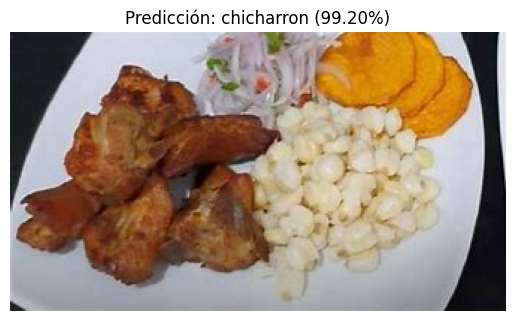

1/1 [==============================] - 1s 538ms/step


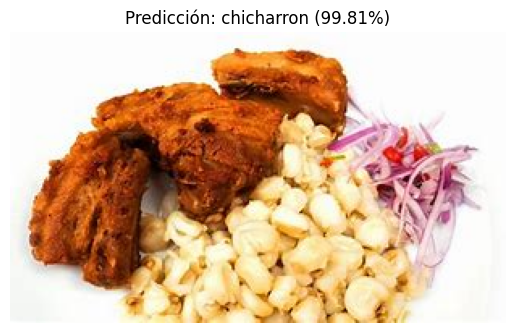

1/1 [==============================] - 1s 568ms/step


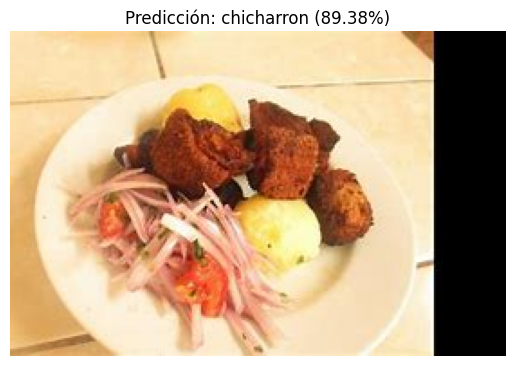

1/1 [==============================] - 1s 580ms/step


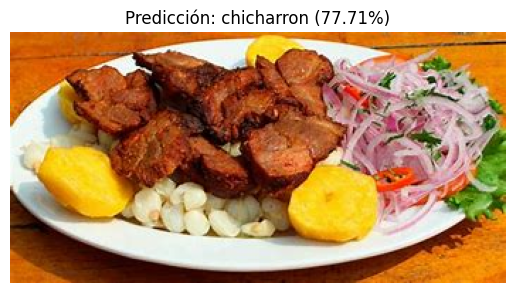

1/1 [==============================] - 1s 948ms/step


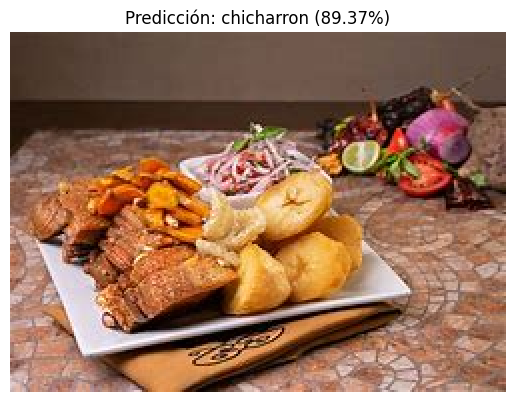

1/1 [==============================] - 1s 952ms/step


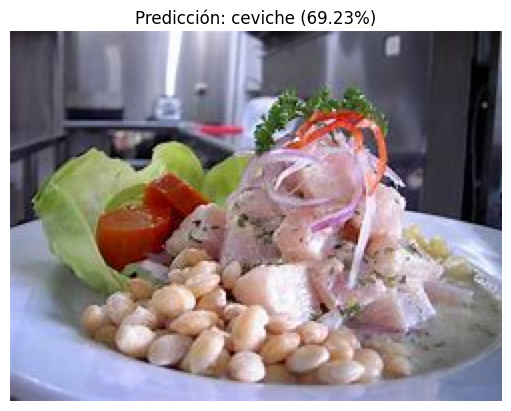

1/1 [==============================] - 1s 672ms/step


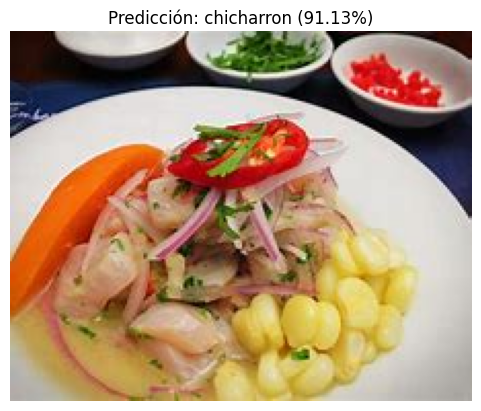

1/1 [==============================] - 1s 555ms/step


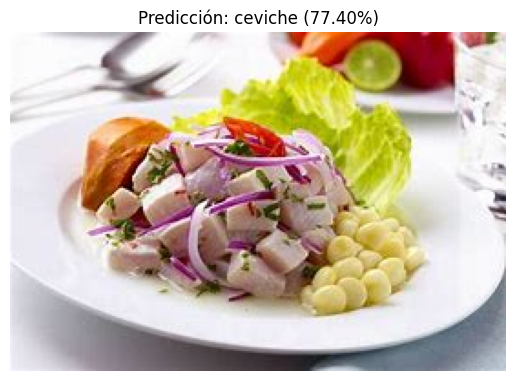

1/1 [==============================] - 1s 574ms/step


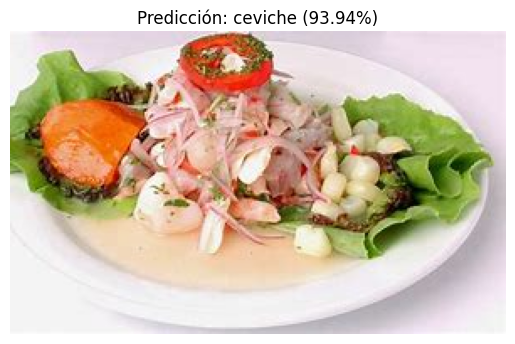

1/1 [==============================] - 1s 552ms/step


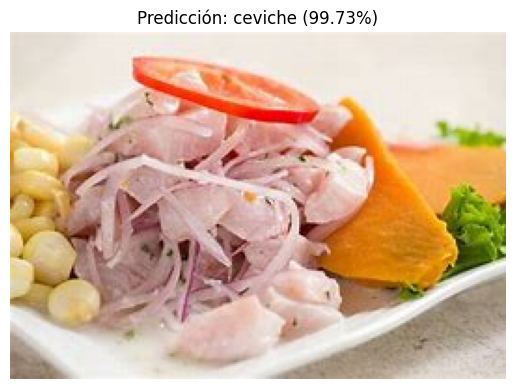

1/1 [==============================] - 1s 556ms/step


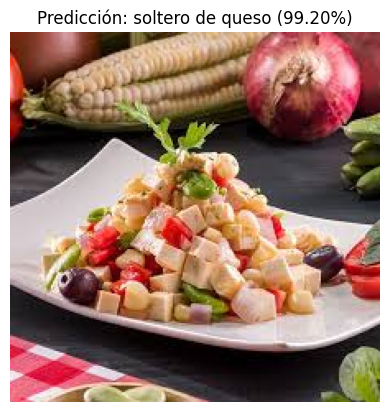

1/1 [==============================] - 1s 569ms/step


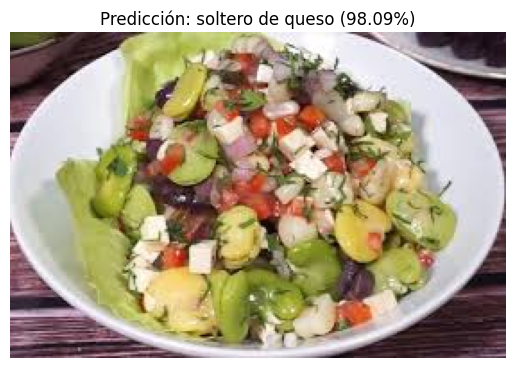

1/1 [==============================] - 1s 530ms/step


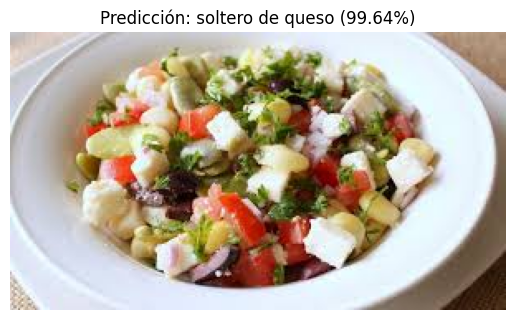

1/1 [==============================] - 1s 528ms/step


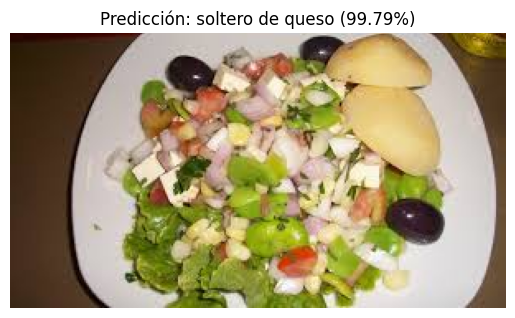

1/1 [==============================] - 1s 695ms/step


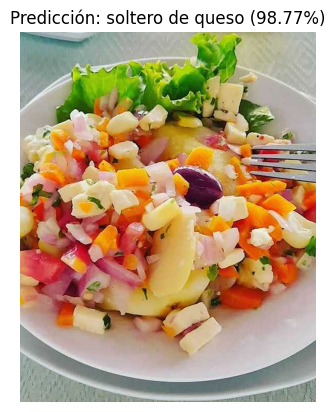

In [1]:
import os
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from PIL import Image
import matplotlib.pyplot as plt

# Ruta al modelo entrenado y a la carpeta de predicciones
model_path = '/content/drive/MyDrive/semaforo/Models/food150_classification_experimento_model.h5'
prediction_folder ='/content/drive/MyDrive/semaforo/prediccion'

# Verifique si el prediction_folder existe
if not os.path.exists(prediction_folder):
    os.makedirs(prediction_folder)

# Cargar el modelo entrenado
model = load_model(model_path)

# Diccionario de clases (debes ajustar esto según tus clases)
class_indices = {'ceviche': 0, 'chicharron': 1, 'soltero de queso': 2}   # Ajusta según tus clases
class_labels = {v: k for k, v in class_indices.items()} # Invertir el diccionario

# Establecer el umbral mínimo de probabilidad
min_probability = 0.8  # Ajustar según la necesidad (por ejemplo, 0.8 para un 80% de confianza)

# Función para preprocesar la imagen
def preprocess_image(image_path, resize=(224, 224)):
    """Preprocesa una imagen para la inferencia."""
    image = Image.open(image_path).convert('RGB') # Convertir imagen a RGB
    image = image.resize(resize)
    image = np.array(image)
    image = image.astype('float32') / 255.0  # Normalizar entre 0 y 1
    image = np.expand_dims(image, axis=0)  # Agregar dimensión para el modelo
    return image

# Leer y predecir cada imagen en la carpeta de predicciones
for file_name in os.listdir(prediction_folder):
    image_path = os.path.join(prediction_folder, file_name)
    image = preprocess_image(image_path)

    # Realizar la predicción
    prediction = model.predict(image)
    predicted_class = np.argmax(prediction, axis=1)[0]
    predicted_label = class_labels[predicted_class]
    probability = np.max(prediction) * 100  # Convertir a porcentaje

    # Mostrar la imagen solo si la probabilidad supera el umbral
    if probability >= min_probability:
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.title(f"Predicción: {predicted_label} ({probability:.2f}%)")
        plt.axis('off')
        plt.show()